In [ ]:
#Installing necessary libraries
!pip install geopandas matplotlib seaborn folium
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

#Loading GeoJson Files
wards = gpd.read_file('Wards_from_2022.geojson')
flood_risk = gpd.read_file('Storm_Surge_Risk_Areas.geojson')

In [ ]:
#Reprojecting for accurate area calculations
wards = wards.to_crs(epsg = 26918) #UTM Zone 18N for D.C.
flood_risk = flood_risk.to_crs(epsg = 26918)

#Calculating intersection and flood percentages
flooded_areas = gpd.overlay(wards, flood_risk, how = 'intersection')
flooded_areas['flooded_area'] = flooded_areas.geometry.area
wards['total area'] = wards.geometry.area

#Merge resuls
result = wards.merge(flooded_areas.groupby('WARD')['flooded_area'].sum().reset_index(), on = 'WARD', how = 'left').fillna(0)
result['flood_pct'] = (result['flooded_area'] / result['total area']) * 100

/tmp/ipython-input-2-533739375.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = wards.merge(flooded_areas.groupby('WARD')['flooded_area'].sum().reset_index(), on = 'WARD', how = 'left').fillna(0)


/tmp/ipython-input-3-2029021652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


<function matplotlib.pyplot.show(close=None, block=None)>

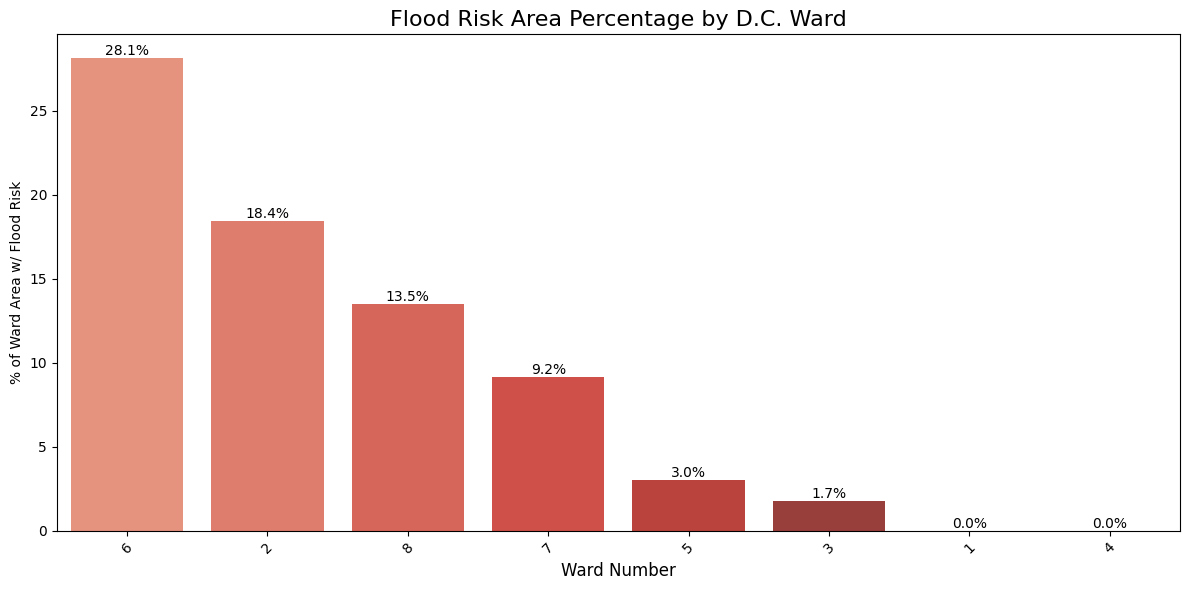

In [ ]:
#Sorting for visualization
result_sorted = result.sort_values('flood_pct', ascending = False)

# 1. BAR CHART (w/ Individaul Ward %)
plt.figure(figsize = (12, 6))
barplot = sns.barplot(
    x = 'WARD',
    y = 'flood_pct',
    data = result_sorted,
    palette = 'Reds_d',
    order = result_sorted['WARD'] #Sorting by flood %
)

#Customization of the plot
plt.title('Flood Risk Area Percentage by D.C. Ward', fontsize = 16)
plt.xlabel('Ward Number', fontsize = 12)
plt.ylabel('% of Ward Area w/ Flood Risk')
plt.xticks(rotation = 45)

#Adding value labels on top of bars
for p in barplot.patches:
  barplot.annotate(
      f'{p.get_height():.1f}%',
      (p.get_x() + p.get_width() / 2., p.get_height()),
      ha = 'center',
      va = 'center',
      xytext = (0, 5),
      textcoords = 'offset points'
  )

plt.tight_layout()
plt.show